In [43]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt 

In [45]:
import seaborn as sns

In [46]:
import numpy as np

In [47]:
df=pd.read_csv('F:/imarticus/imarticus data given by sir/svm data..lms/Predicting Term Deposit Subscription by a client/Dataset/bank-additional-full.csv...11.csv')

In [48]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [50]:
df.shape

(41188, 21)

In [51]:
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  10
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Number of Categorical features:  11
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


# boxplot to see outliers

<AxesSubplot:>

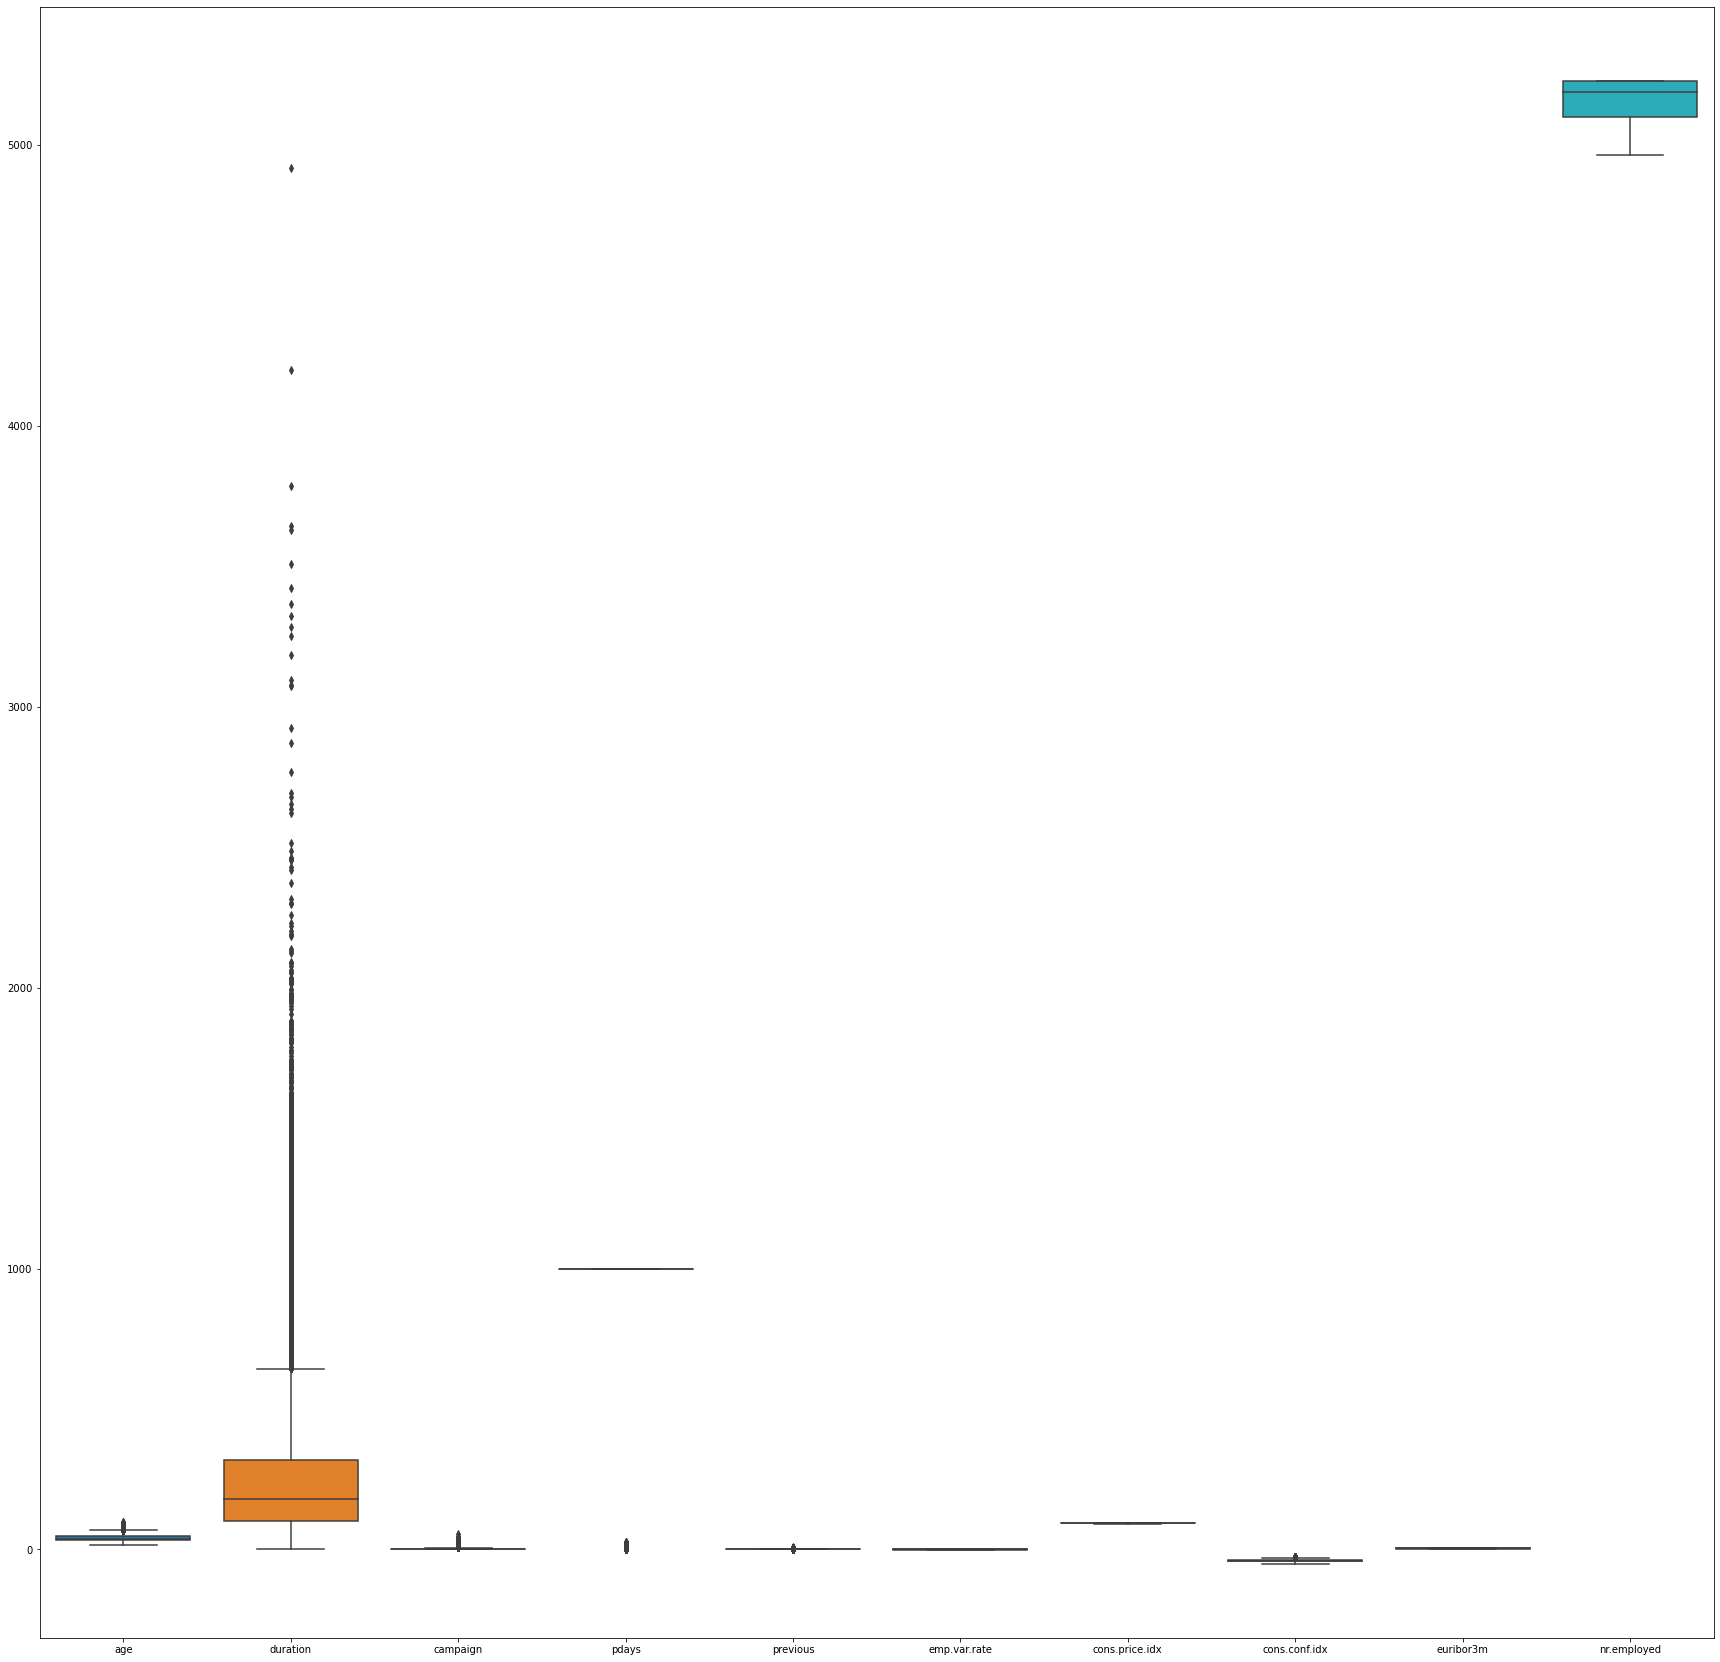

In [52]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

# Removing Outliers

In [53]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df[['duration']], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[['duration']], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[['duration']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[['duration']] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (41188, 21)
New Shape:  (38225, 21)


In [54]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [55]:
df.loc[df['y']=='no','y']=0
df.loc[df['y']=='yes','y']=1

In [56]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# independent and dependent variable

In [57]:
x=df.drop(['y','default'],axis=1)
y=df.y

# changing datatype

In [58]:
y = y.astype('int')

In [59]:
x

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [60]:
numerical_features = x.dtypes[x.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = x.dtypes[x.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  10
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Number of Categorical features:  9
Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')


# making dummies

In [61]:
num=x[x.select_dtypes(include=[np.number]).columns.tolist()]

In [62]:
dummies=pd.get_dummies(x[x.select_dtypes(include=['object']).columns.tolist()])

In [63]:
x_combined=pd.concat([num,dummies],axis=1)

In [64]:
x_combined

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


# train_test_split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size=0.2, random_state=123)

In [67]:
# print the shape of 'X_train'
print("X_train ",x_train.shape)

# print the shape of 'X_test'
print("X_test ",x_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (30580, 60)
X_test  (7645, 60)
y_train  (30580,)
y_test  (7645,)


# SVM

In [68]:
from sklearn.svm import SVC

In [69]:
svclassifier = SVC(kernel='linear')

In [70]:
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [71]:
ypred = svclassifier.predict(x_test)

In [72]:
ypred.shape

(7645,)

In [73]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(confusion_matrix(y_test, ypred))

[[6770  278]
 [ 351  246]]


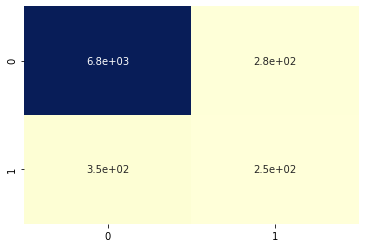

In [75]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test, ypred)

# plot a heatmap
sns.heatmap(cm, annot=True,cmap="YlGnBu",cbar=False)

# display the plot
plt.show()

In [76]:
from sklearn.metrics import classification_report

In [77]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test, ypred)

In [78]:
# print the result
print(result)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7048
           1       0.47      0.41      0.44       597

    accuracy                           0.92      7645
   macro avg       0.71      0.69      0.70      7645
weighted avg       0.91      0.92      0.92      7645



In [79]:
import sklearn.metrics as metrics

In [80]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, ypred)

# print kappa
print('kappa value:',kappa)

kappa value: 0.39470423716663416


# Sensitivity and Specificity

In [81]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9507091700603848
Specificity :  0.46946564885496184


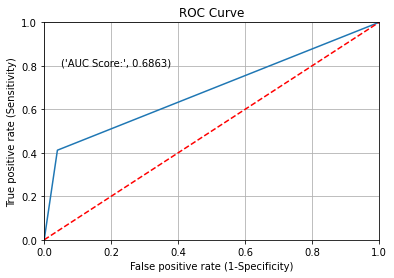

In [82]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_test, ypred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, ypred),4)))

# name the plot, and both axes
plt.title('ROC Curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

# making the model with best parameter using gridsearchcv

In [91]:
from sklearn.model_selection import GridSearchCV 
# defining parameter range 
param_grid = {'C': [0.1],  
              'gamma': [1], 
              'kernel': ['rbf']}  
  
svm_grid = GridSearchCV(SVC(), param_grid) 
  
# fitting the model for grid search 
svm_grid.fit(x_train, y_train) 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [1], 'kernel': ['rbf']})

In [92]:
# print best parameter after tuning 
print(svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svm_grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [93]:
svm_grid_predictions = svm_grid.predict(x_test)  

# Check the model performance using the accuracy, auc roc, precision, recall,etc.

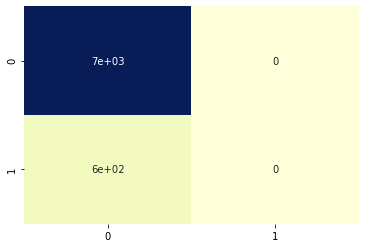

In [94]:
# compute the confusion matrix
cm = confusion_matrix(y_test, svm_grid_predictions)

# plot a heatmap
sns.heatmap(cm, annot=True,cmap="YlGnBu",cbar=False)

# display the plot
plt.show()

In [95]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test, svm_grid_predictions)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7048
           1       0.00      0.00      0.00       597

    accuracy                           0.92      7645
   macro avg       0.46      0.50      0.48      7645
weighted avg       0.85      0.92      0.88      7645



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
kappa = metrics.cohen_kappa_score(y_test, svm_grid_predictions)

# print kappa
print('kappa value:',kappa)

kappa value: 0.0


In [97]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9219097449313277
Specificity :  nan


<ipython-input-97-a0353775a5eb>:4: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = cm[1,1]/(cm[1,1]+cm[0,1])


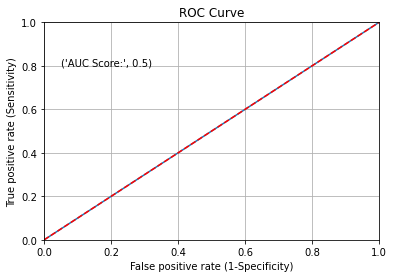

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, svm_grid_predictions)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, svm_grid_predictions),4)))

# name the plot, and both axes
plt.title('ROC Curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)